# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## imports for Python, Pandas

In [ ]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [ ]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [ ]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

In [ ]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [ ]:
# load json as string
#json.load((open('data/world_bank_projects_less.json')))

In [ ]:
# load as Pandas dataframe
#sample_json_df = pd.read_json('data/world_bank_projects_less.json')
#sample_json_df

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [ ]:
#JSON string example
wbp_str = json.load((open('C:\\Users\\KETT\\Desktop\\JSON_mini_project\\data_wrangling_json\\data\\world_bank_projects.json')))
wbp_str

In [ ]:
#Example creating dataframe from JSON string
world_bank_projects1 = json_normalize(wbp_str)
world_bank_projects1



In [ ]:
#creating dataframe from json file
world_bank_projects2 = pd.read_json(r'~/Desktop/JSON_mini_project/data_wrangling_json/data/world_bank_projects.json')

#shortened name of world_bank_projects
wbp = world_bank_projects2 
wbp.columns

In [ ]:
#excercise 1 approach 1 - top 10 countries with the most problems
top_countries1 = wbp.countryname.value_counts().head(10)
#2.67 ms

top_countries1.plot(kind = 'bar', title = 'Amount of Projects', yticks = [0,5,10,15,20], ylim = (0, (max(top_countries1) + 3)))



In [ ]:
#excercise 1 approach 2 - top 10 countries with the most problems
top_countries2 = wbp.groupby('countryname')['project_name'].nunique().sort_values(ascending = False).head(10)
#4.34 ms
top_countries2.plot(kind = 'barh', title = 'Amount of Projects', position = 1, rot = 10, grid = True)

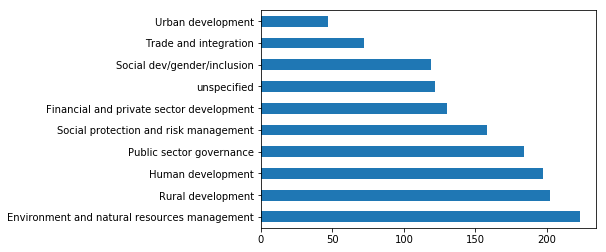

In [74]:
#Excercise 2 approach 1 - 10 major project themes (using column 'mjtheme_namecode')
load = []
#unpack the column
for row in wbp.mjtheme_namecode:
    for element in row:
        load.append(element)
        
mjtheme = pd.DataFrame(load)
top10_mjtheme = mjtheme.name.replace('' , 'unspecified').value_counts().head(10)
top10_mjtheme.plot(kind = 'barh' )

In [ ]:
#Excercise 3 approach 1 fill in empty strings within name column
load1 = []
#unpack the column
for row in wbp.mjtheme_namecode:
    for element in row:
        load1.append(element)

for brackets in load1:
    for key, value in brackets.items():
        if value == "":
            brackets[key] = "unspecified again"
            
pd.DataFrame.from_dict(load1)

#clear cell to check the next approach to eliminate doubled values

In [ ]:
#Excercise 3 approach 2 fill in empty strings within name column
mjtheme['name'] = mjtheme.name.replace('', 'unspecified')
mjtheme